In [28]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [18]:
#reading data.
df=pd.read_csv('/content/drive/MyDrive/datasets/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


Text(0.5, 1.0, 'Histogram for Insurance Charges.')

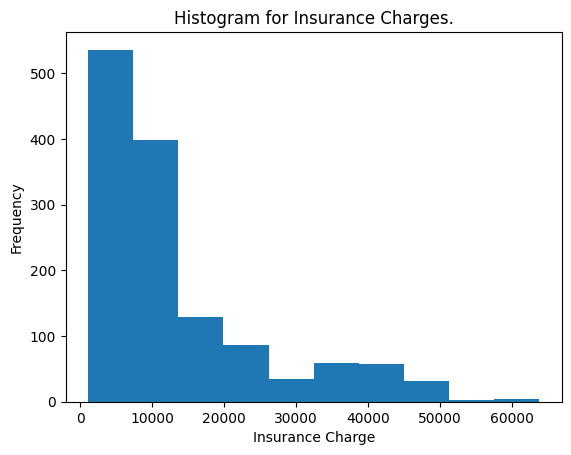

In [19]:
#EDA

#plotting histogram to identify pattern of data
plt.hist(x=df['charges'])
plt.xlabel('Insurance Charge')
plt.ylabel('Frequency')
plt.title('Histogram for Insurance Charges.')

In [20]:
#stastical analysis.

#identifing destribuation of data in important columns .

#destribuation of sex in data in percentage.
print(round((df['sex'].value_counts()/len(df['sex']) )*100,2))

#destribuation of children
print(round((df['children'].value_counts()/len(df['sex']) )*100,2))

#destribuation of smookers
print(round((df['smoker'].value_counts()/len(df['sex']) )*100,2))

male     50.52
female   49.48
Name: sex, dtype: float64
0   42.90
1   24.22
2   17.94
3   11.73
4    1.87
5    1.35
Name: children, dtype: float64
no    79.52
yes   20.48
Name: smoker, dtype: float64


<Axes: xlabel='charges'>

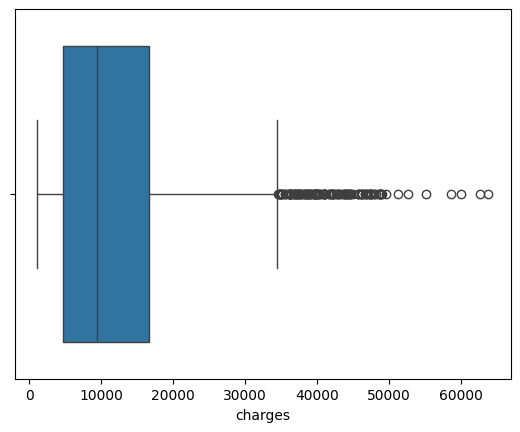

In [21]:
# prompt: check outliers in charges

import seaborn as sns
sns.boxplot(x=df['charges'])


In [22]:
#finding outliers and creating a new data frame to study outliers and normal data.
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

outliers=find_outliers_IQR(df['charges'])
outliers_df = df[df['charges'].isin(outliers)]

filterd_df=df[ ~df.index.isin(outliers_df.index)]


print("percentage of outliers",(len(outliers_df)/len(df))*100)

percentage of outliers 10.388639760837071


In [23]:
#Analysis.

#questions to investgate.

#1) Which attribute impacts on higher insurance.
#2) study findings of attributes in the finding of q2 and identify patterns in it.
#3) Suggest the best way to minimise the insurance.

            age   bmi  children  charges
region                                  
northeast 39.07 28.71      1.04 10736.26
northwest 38.96 28.87      1.11 10363.59
southeast 38.57 32.61      1.05  9574.28
southwest 39.38 30.14      1.14  9021.45


<ipython-input-45-aabfe041f486>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_area=filterd_df.groupby('region').mean()


<BarContainer object of 4 artists>

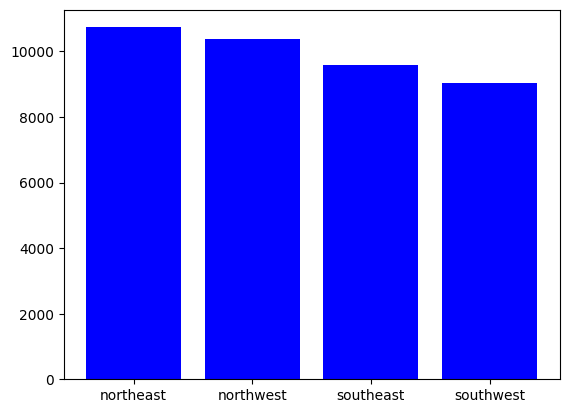

In [45]:
#Q1

#investageting impact of region on insurance price.
df_area=filterd_df.groupby('region').mean()
pd.options.display.float_format = '{:.2f}'.format
print(df_area)

plt.bar(df_area.index,df_area['charges'],color='blue')



Text(0.5, 1.0, 'Charges Distribution for Smokers and Non-Smokers')

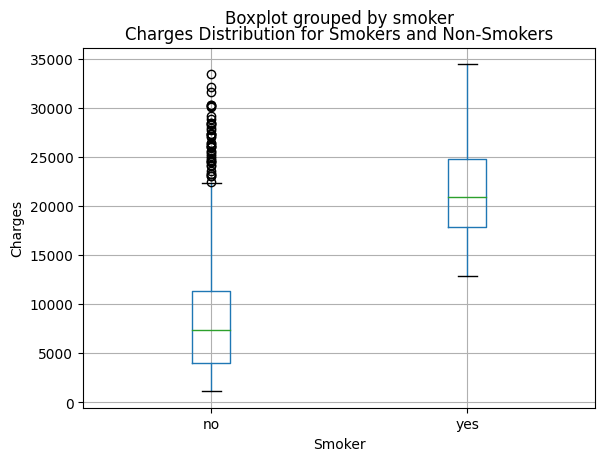

In [51]:
filterd_df.boxplot(column='charges', by='smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution for Smokers and Non-Smokers')

#clearly smokers are likely to get way higher insurance premium.

Text(0.5, 1.0, 'Charges Distribution for Smokers and Non-Smokers')

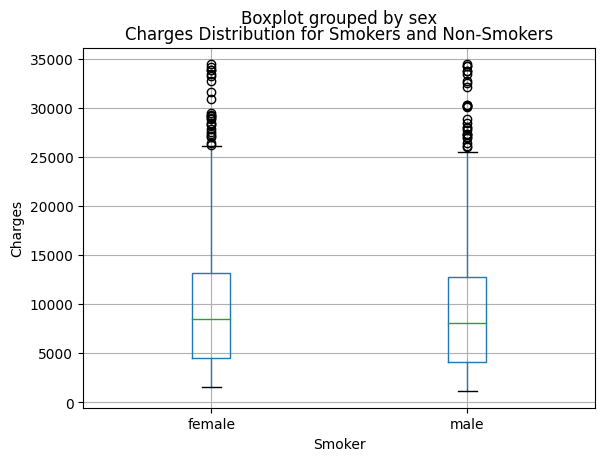

In [53]:
filterd_df.boxplot(column='charges', by='sex')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution for Smokers and Non-Smokers')

#sex is not a influencing factor for insurance charges.

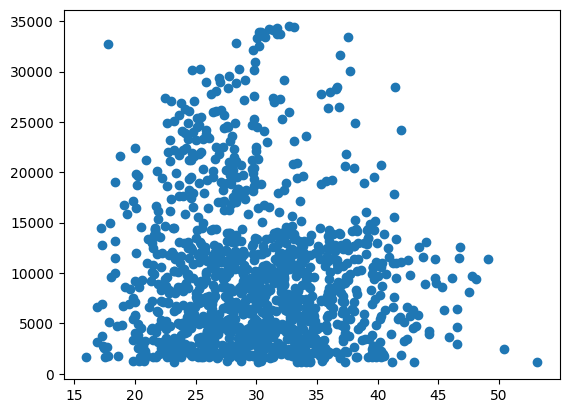

In [54]:
from itertools import chain
#scatter plot between BMI and charge
plt.scatter(filterd_df['bmi'],filterd_df['charges'])
#there is no clear relation between bmi and cost of insurance.

<ipython-input-84-a29edb15ccf0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterd_df['label']=pd.cut(df['age'],[10,20,30,40,50,60,70],labels=['10-20','20-30','30-40','40-50','50-60','60-70'])


<BarContainer object of 6 artists>

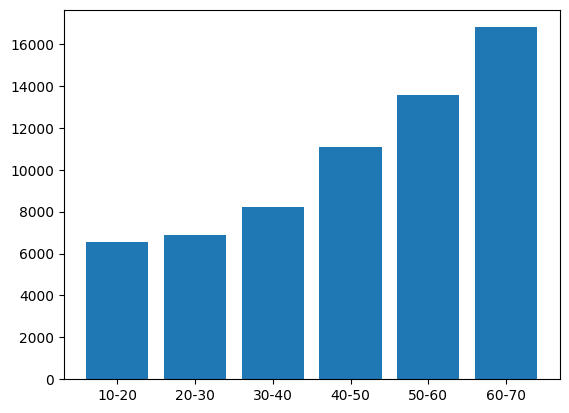

In [84]:
ma=df['age'].max()
min=df['age'].min()

filterd_df['label']=pd.cut(df['age'],[10,20,30,40,50,60,70],labels=['10-20','20-30','30-40','40-50','50-60','60-70'])

df_age=filterd_df.groupby('label')['charges'].mean()
df_age
plt.bar(df_age.index,df_age.values)

#As expected as age increases the premium increases exponentially.

<BarContainer object of 6 artists>

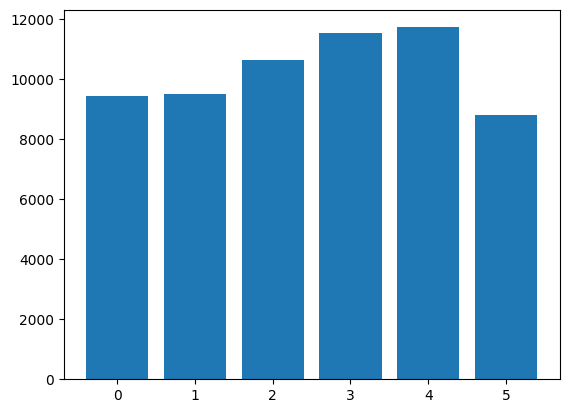

In [92]:
df_childrens=filterd_df.groupby('children')['charges'].mean()
plt.bar(df_childrens.index,df_childrens.values)

#higher number of childrens slightly affetcs the premium price However the drop  for 5 children is not stuidable due to lack of data.

In [120]:
#analysing outliers.
print("ratio of regions in outliers \n",(outliers_df['region'].value_counts()/len(outliers_df))*100)
print("\n\n ratio of sex in outliers \n",(outliers_df['sex'].value_counts()/len(outliers_df))*100)
print("\n\n ratio of number of children in outliers \n",(outliers_df['children'].value_counts()/len(outliers_df))*100)

#there is no visible/uncommon pattern in the description of data.

ratio of regions in outliers 
 southeast   41.01
southwest   24.46
northeast   20.14
northwest   14.39
Name: region, dtype: float64


 ratio of sex in outliers 
 male     64.03
female   35.97
Name: sex, dtype: float64


 ratio of number of children in outliers 
 0   37.41
2   24.46
1   23.02
3   13.67
4    1.44
Name: children, dtype: float64


(array([17., 13., 11., 13., 11., 19., 14., 12., 11., 18.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

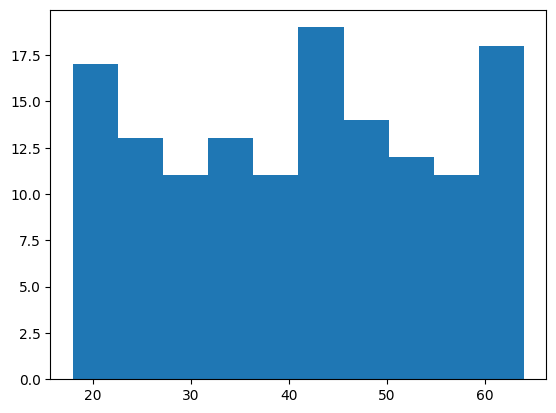

In [102]:
plt.hist(outliers_df['age'])
#the age is distributed evenly,there is not particular pattern in outliers in terms of age.

In [113]:
#to verify finding plotting co-rrelation plot.
from sklearn.preprocessing import LabelEncoder

df_encoded = pd.get_dummies(filterd_df, columns=['region'], prefix='region', dtype=int)

label_encoder = LabelEncoder()
df_encoded['smoker_encoded'] = label_encoder.fit_transform(df_encoded['smoker'])
df_encoded['sex_encoded'] = label_encoder.fit_transform(df_encoded['sex'])

df_encoded=df_encoded.drop(columns=['smoker','sex','label'])
df_encoded

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded,sex_encoded
0,19,27.90,0,16884.92,0,0,0,1,1,0
1,18,33.77,1,1725.55,0,0,1,0,0,1
2,28,33.00,3,4449.46,0,0,1,0,0,1
3,33,22.70,0,21984.47,0,1,0,0,0,1
4,32,28.88,0,3866.86,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.97,3,10600.55,0,1,0,0,0,1
1334,18,31.92,0,2205.98,1,0,0,0,0,0
1335,18,36.85,0,1629.83,0,0,1,0,0,0
1336,21,25.80,0,2007.94,0,0,0,1,0,0


Text(0.5, 1.0, 'Correlation Matrix')

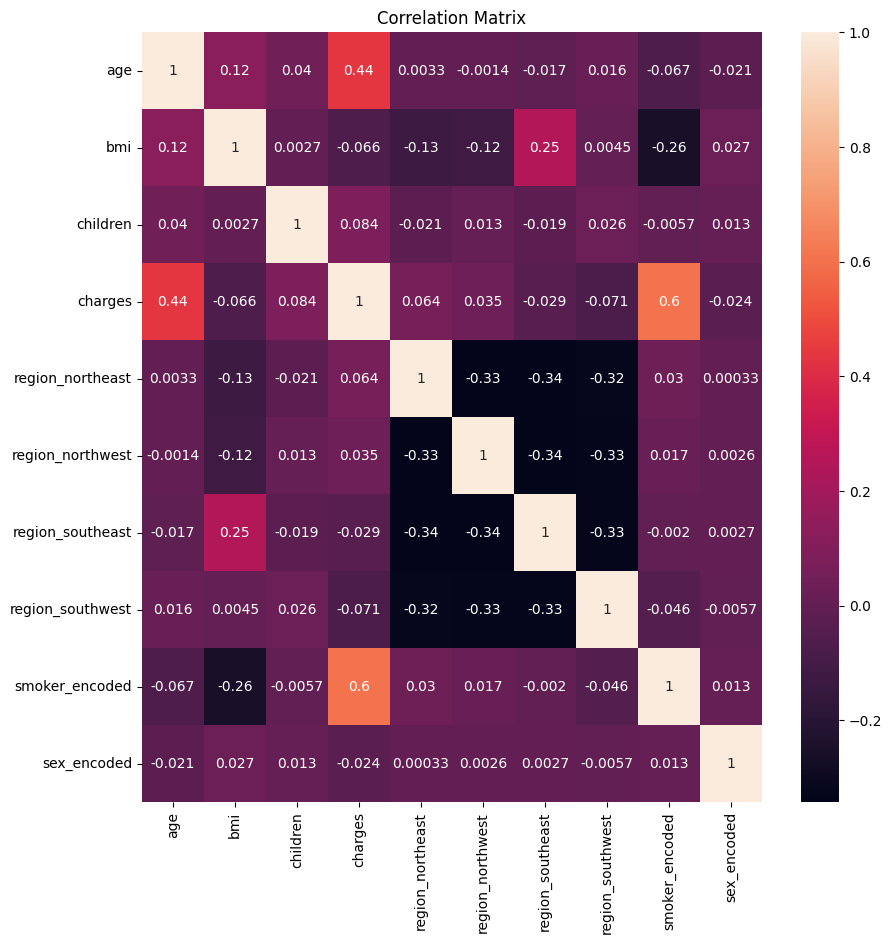

In [119]:
#plotting correlation graph.
corr_matrix=df_encoded.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")

#we can see that the correlation plot supports our findings that smoking is biggest factor influencing premium price followed by age.

In [122]:
#Conclusion of study.
#age and smoking is one of the most influencing attributes for an increase in premium
# The number of children slightly affects the premium.
#to study outliers we don,t have enough attributes.